In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import random
import os

In [2]:
%run ./Combine_csv.ipynb

In [3]:
import datetime

now = datetime.datetime.now()


Today_time = now.strftime("%H:%M")

Today_date = now.strftime("%Y-%m-%d")


In [4]:
prefix_dir =r"C:\Users\drago\Documents\GitHub\Summer-Project\Education\Combined CSV\ "
suffix_dir = 'combined_education-'+Today_date+'.csv'
today_csv=prefix_dir[:-1] +suffix_dir

In [5]:
education = pd.read_csv(today_csv)

In [6]:
education

,Newspaper,Heading,Date,Time,URL
0,Hindiustan Times,RBSE 10th result 2019: Where and how to check ...,2019-06-03,16:23:00,https://www.hindustantimes.com/education/rbse-...
1,Hindiustan Times,Rajasthan Board Result 2019: RBSE 10th results...,2019-06-03,16:19:00,https://www.hindustantimes.com/education/rajas...
2,Hindiustan Times,AKTU to announce UPSEE result 2019 today,2019-06-03,19:32:00,https://www.hindustantimes.com/education/aktu-...
3,Hindiustan Times,"AKTU UPSEE Result 2019 announced, Ghaziabad b...",2019-06-03,19:31:00,https://www.hindustantimes.com/education/upsee...
4,Hindiustan Times,"RBSE 10th Result 2019 declared, 79.85% pass, J...",2019-06-03,19:20:00,https://www.hindustantimes.com/education/rbse-...
5,Hindiustan Times,Bihar Board OFSS admission 2019-20: First meri...,2019-06-03,15:41:00,https://www.hindustantimes.com/education/bihar...
6,Hindiustan Times,AKTU to announce UPSEE result 2019 today,2019-06-03,19:32:00,https://www.hindustantimes.com/education/aktu-...
7,Hindiustan Times,RBSE 10th result 2019: Where and how to check ...,2019-06-03,16:23:00,https://www.hindustantimes.com/education/rbse-...
8,Hindiustan Times,RBSE 10th Result 2019 Live: Rajasthan Board 10...,2019-06-03,19:07:00,https://www.hindustantimes.com/education/rajas...
9,Hindiustan Times,"Rules, lower fee makes Maharashtra state board...",2019-06-03,17:58:00,https://www.hindustantimes.com/education/rules...


In [7]:
education['Newspaper'].value_counts()

Hindiustan Times    53
India Today         49
Time of India       19
Indian Express      16
Name: Newspaper, dtype: int64

In [8]:
education.shape

(137, 5)

In [9]:
#df=education[education['Date']==Today_date]
df=education

Heading = df['Heading']

In [10]:
df.head()

,Newspaper,Heading,Date,Time,URL
0,Hindiustan Times,RBSE 10th result 2019: Where and how to check ...,2019-06-03,16:23:00,https://www.hindustantimes.com/education/rbse-...
1,Hindiustan Times,Rajasthan Board Result 2019: RBSE 10th results...,2019-06-03,16:19:00,https://www.hindustantimes.com/education/rajas...
2,Hindiustan Times,AKTU to announce UPSEE result 2019 today,2019-06-03,19:32:00,https://www.hindustantimes.com/education/aktu-...
3,Hindiustan Times,"AKTU UPSEE Result 2019 announced, Ghaziabad b...",2019-06-03,19:31:00,https://www.hindustantimes.com/education/upsee...
4,Hindiustan Times,"RBSE 10th Result 2019 declared, 79.85% pass, J...",2019-06-03,19:20:00,https://www.hindustantimes.com/education/rbse-...


In [11]:
df['Newspaper'].value_counts()

Hindiustan Times    53
India Today         49
Time of India       19
Indian Express      16
Name: Newspaper, dtype: int64

In [12]:
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.decomposition import TruncatedSVD

In [13]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\drago\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
stopset = set(stopwords.words('english'))

In [15]:
#### Delete This
#from sklearn.datasets import fetch_20newsgroups
#categories = ['rec.sport.baseball']
#dataset = fetch_20newsgroups(subset='all',shuffle=True, random_state=42, categories=categories)
#corpus=dataset.data


Tokenizing and Stemming

In [16]:
import nltk
import re

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\drago\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [18]:
def tokenize_and_stem(text):
   
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []

    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):

    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
   
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [19]:
Heading_stemmed = []
Heading_tokenized = []
for i in Heading:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'Heading', tokenize/stem
    Heading_stemmed.extend(allwords_stemmed) #extend the 'Heading_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    Heading_tokenized.extend(allwords_tokenized)

In [20]:
 Heading_tokenized[:10]    # 10 out of all

['rbse',
 '10th',
 'result',
 'where',
 'and',
 'how',
 'to',
 'check',
 'rajasthan',
 '10th']

In [21]:
Heading_stemmed[:]   # 10 out of all

['rbse',
 '10th',
 'result',
 'where',
 'and',
 'how',
 'to',
 'check',
 'rajasthan',
 '10th',
 'board',
 'result',
 'rajasthan',
 'board',
 'result',
 'rbse',
 '10th',
 'result',
 'declar',
 'check',
 'at',
 'rajresults.nic.in',
 'aktu',
 'to',
 'announc',
 'upse',
 'result',
 'today',
 'aktu',
 'upse',
 'result',
 'announc',
 'ghaziabad',
 'boy',
 'prashant',
 'mishra',
 'top',
 'check',
 'detail',
 'and',
 'result',
 'here',
 'rbse',
 '10th',
 'result',
 'declar',
 'pass',
 'jaipur',
 'girl',
 'shiela',
 'jatt',
 'score',
 'bihar',
 'board',
 'ofss',
 'admiss',
 'first',
 'merit',
 'list',
 'out',
 'check',
 'detail',
 'here',
 'aktu',
 'to',
 'announc',
 'upse',
 'result',
 'today',
 'rbse',
 '10th',
 'result',
 'where',
 'and',
 'how',
 'to',
 'check',
 'rajasthan',
 '10th',
 'board',
 'result',
 'rbse',
 '10th',
 'result',
 'live',
 'rajasthan',
 'board',
 '10th',
 'result',
 'declar',
 'here',
 'is',
 'direct',
 'link',
 'to',
 'check',
 'rule',
 'lower',
 'fee',
 'make',
 'maha

In [22]:
words_frame = pd.DataFrame({'words': Heading_tokenized}, index = Heading_stemmed)

In [23]:
words_frame.head(10)

,words
rbse,rbse
10th,10th
result,result
where,where
and,and
how,how
to,to
check,check
rajasthan,rajasthan
10th,10th


TF-IDF

In [24]:
##Important : min_df
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,4))

In [25]:
tfidf_matrix = vectorizer.fit_transform(Heading)

In [26]:
print(tfidf_matrix.shape)

(137, 2584)


In [27]:
print(tfidf_matrix[0])

  (0, 1816)	0.1396895763275744
  (0, 3)	0.2376126860123122
  (0, 1919)	0.18125460913627833
  (0, 512)	0.11582719294980531
  (0, 1783)	0.16021676156317619
  (0, 315)	0.1188063430061561
  (0, 1817)	0.15668545144151905
  (0, 23)	0.14213374696643866
  (0, 1927)	0.21638070988832264
  (0, 540)	0.23008901393098372
  (0, 1784)	0.23008901393098372
  (0, 10)	0.23008901393098372
  (0, 363)	0.18335163645163272
  (0, 1818)	0.15668545144151905
  (0, 26)	0.23008901393098372
  (0, 1928)	0.23008901393098372
  (0, 541)	0.23008901393098372
  (0, 1785)	0.23008901393098372
  (0, 11)	0.23008901393098372
  (0, 1819)	0.23008901393098372
  (0, 27)	0.23008901393098372
  (0, 1929)	0.23008901393098372
  (0, 542)	0.23008901393098372
  (0, 1786)	0.23008901393098372


In [28]:
vectorizer.get_feature_names()[:] 

["'s",
 "'s direct",
 "'s direct link",
 '10th',
 '10th 12th',
 '10th 12th result',
 '10th 12th result declar',
 '10th 12th result highlight',
 '10th 12th result pass',
 '10th 12th result uttarakhand',
 '10th board',
 '10th board result',
 '10th compart',
 '10th compart result',
 '10th compart result date',
 '10th compart result declar',
 '10th compart result highlight',
 '10th compartment',
 '10th compartment result',
 '10th compartment result s',
 '10th girl',
 '10th girl outshin',
 '10th girl outshin boy',
 '10th result',
 '10th result announc',
 '10th result announc check',
 '10th result check',
 '10th result check rajasthan',
 '10th result declar',
 '10th result declar check',
 '10th result declar direct',
 '10th result declar pass',
 '10th result declar rajresults.nic.in',
 '10th result girl',
 '10th result girl perform',
 '10th result key',
 '10th result key highlight',
 '10th result live',
 '10th result live rajasthan',
 '10th result live updat',
 '10th result rajresults.nic.in

In [29]:
terms = vectorizer.get_feature_names()

Cosine similarity

In [30]:
from sklearn.metrics.pairwise import cosine_similarity


In [31]:
dist = cosine_similarity(tfidf_matrix)

In [32]:
dist.shape

(137, 137)

In [33]:
print(dist)

[[1.         0.2322554  0.02075411 ... 0.09488205 0.05235595 0.1324094 ]
 [0.2322554  1.         0.02036293 ... 0.19289755 0.09413495 0.24510377]
 [0.02075411 0.02036293 1.         ... 0.00940911 0.01290622 0.01029441]
 ...
 [0.09488205 0.19289755 0.00940911 ... 1.         0.09768878 0.23926323]
 [0.05235595 0.09413495 0.01290622 ... 0.09768878 1.         0.05337399]
 [0.1324094  0.24510377 0.01029441 ... 0.23926323 0.05337399 1.        ]]


## K-Means

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd


### Finding Number of Clusters

In [35]:
n_clusters = list (range (15,25))
min=999
for n in n_clusters:
    km_ss = KMeans(n_clusters=n)
    #km_ss.fit(tfidf_matrix) 
    clusters_ss = km_ss.fit_predict(tfidf_matrix)
    #centers_ss = km_ss.cluster_centers_ 
    score = silhouette_score(dist,clusters_ss)
    if min>score:
        min=score
        n_score=n
    print ("For n = {}, silhouette score is {})".format(n, score))
    

For n = 15, silhouette score is 0.06295262436925131)
For n = 16, silhouette score is 0.06456121721066994)
For n = 17, silhouette score is 0.05991064869165086)
For n = 18, silhouette score is 0.06245299718942642)
For n = 19, silhouette score is 0.05396392191796953)
For n = 20, silhouette score is 0.07797602984384655)
For n = 21, silhouette score is 0.07442492415006183)
For n = 22, silhouette score is 0.06153904307131933)
For n = 23, silhouette score is 0.09249614820807239)
For n = 24, silhouette score is 0.09251303652944634)


In [36]:
n_score

19

In [37]:
num_clusters = n_score
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=19, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [38]:
clusters = km.labels_.tolist()

In [39]:
df['Cluster'] = clusters

In [40]:
#X_dist = km.transform(tfidf_matrix)**2  ###tranform returns distance from centroid
#sqddist = X_dist.sum(axis=1).round(2)
#df['sqddist'] = sqddist

In [41]:
df['Cluster'].value_counts()

0     23
6     15
9     11
14    10
4      9
15     7
3      7
18     7
13     6
12     6
17     6
5      6
1      6
8      5
10     4
16     3
11     2
7      2
2      2
Name: Cluster, dtype: int64

## Plotting the points

In [42]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [43]:
cluster_names = {}
keys = range(n_score)   ## n_score = number of clusters
for i in keys:
       cluster_names[i] = 'Cluster '+str(i)
print(cluster_names)

{0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', 3: 'Cluster 3', 4: 'Cluster 4', 5: 'Cluster 5', 6: 'Cluster 6', 7: 'Cluster 7', 8: 'Cluster 8', 9: 'Cluster 9', 10: 'Cluster 10', 11: 'Cluster 11', 12: 'Cluster 12', 13: 'Cluster 13', 14: 'Cluster 14', 15: 'Cluster 15', 16: 'Cluster 16', 17: 'Cluster 17', 18: 'Cluster 18'}


In [44]:
number_of_colors = n_score

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
cluster_colors={}
for i in range(len(color)):
    cluster_colors[i]=color[i]
print(cluster_colors)

{0: '#093FDD', 1: '#487386', 2: '#ED084F', 3: '#927CD5', 4: '#68DC7B', 5: '#C1D591', 6: '#48371E', 7: '#D94D5B', 8: '#D4BEE3', 9: '#7BBDDA', 10: '#5537A1', 11: '#01AF54', 12: '#EAF425', 13: '#6CAF7D', 14: '#3186FF', 15: '#FF616A', 16: '#302344', 17: '#B7C97F', 18: '#DDDAC8'}


In [45]:
type(cluster_colors)

dict

In [46]:
%matplotlib inline 
df_plot= pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=Heading)) 
df_plot.head()

,x,y,label,title
0,0.031726,0.003941,16,RBSE 10th result 2019: Where and how to check ...
1,-0.012249,-0.039681,14,Rajasthan Board Result 2019: RBSE 10th results...
2,-0.003150,-0.013116,11,AKTU to announce UPSEE result 2019 today
3,-0.003098,-0.000510,7,"AKTU UPSEE Result 2019 announced, Ghaziabad b..."
4,-0.006322,-0.005703,14,"RBSE 10th Result 2019 declared, 79.85% pass, J..."


In [47]:
groups = df_plot.groupby('label')

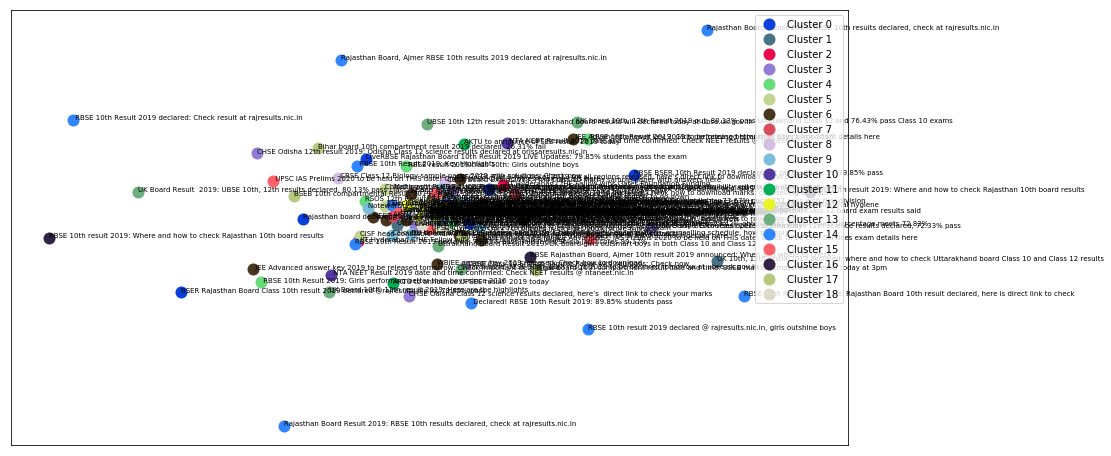

In [48]:
fig, ax = plt.subplots(figsize=(15, 8))

for name,group in groups:
    ax.plot(group.x, group.y, marker='o',linestyle='',ms=12, label=cluster_names[name],color=cluster_colors[name],mec='none')
    ax.set_aspect('auto')   
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
ax.legend(numpoints=1)

for i in range(len(df_plot)):
    ax.text(df_plot.iloc[i]['x'], df_plot.iloc[i]['y'], df_plot.iloc[i]['title'], size=7)

### Closest Point to Centroid

In [49]:
#centers = np.array(km.cluster_centers_)

In [50]:
#data_99 = [ j for j, cluster in enumerate(clusters) if cluster == 1 ]


In [51]:
#cluster_tf_matrix = np.zeros( (  len(data_99) , centers.shape[1] ) )
#cluster_tf_matrix

In [52]:
#for row_num, data in enumerate(data_99):
 #       row = tfidf_matrix[data]
  #      cluster_tf_matrix[row_num] = row

In [53]:
#clostest_data = []
#for i in range(num_clusters):
 #   center = centers[i]
  #  data_i = [ j for j, cluster in enumerate(clusters) if cluster == i ]
    
    
   # cluster_tf_matrix = np.zeros( (  len(data_i) , centers.shape[1] ) )
    #for row_num, data in enumerate(data_i):
     #   row = tfidf_matrix[data]
      #  cluster_tf_matrix[row_num] = row

## Final Result

In [54]:
#df.sort_values(by='Cluster')

In [55]:
#print( "Sqd Dist Mean is {} and Std Deviation is {}".format(df['sqddist'].mean(),df['sqddist'].std()))

In [56]:
#dist_mean=df['sqddist'].mean()
#dist_std=df['sqddist'].std()

In [57]:
#df_less = df[df['sqddist']<dist_mean+dist_std] 

In [58]:
#df_less=df_less.reset_index().drop(['index'],axis=1)

In [59]:
#df_less

In [60]:
#Result = df_less.sort_values('Cluster').groupby(['Cluster'],as_index=False).apply(lambda x: x.sample(1)) ## picking 1 out of each cluster having mean+std/2 < centroid 


In [61]:
#Result = Result.reset_index().drop(['level_0','level_1'],axis=1)

In [62]:
#Result

In [63]:
#df_more = df[df['sqddist']>df['sqddist'].mean()+df['sqddist'].std()/2] 

In [64]:
#df_more

In [65]:
#Result = Result.append(df_more)

In [66]:
#Result=Result.reset_index().drop(['index'],axis=1)

In [67]:
##Result

In [68]:
#Final = Result.drop_duplicates()

 Cluster Similarity

In [69]:
df_sorted=df.sort_values(by='Cluster').reset_index()
df_sorted.drop(['index'],axis=1,inplace=True)

In [70]:
df_sorted.head()

,Newspaper,Heading,Date,Time,URL,Cluster
0,India Today,[WATCH] Nipah virus can be transmitted throug...,2019-06-03,20:54,https://www.indiatoday.in/education-today/vide...,0
1,India Today,JMI researchers discover formula to kill anti...,2019-06-03,20:54,https://www.indiatoday.in/education-today/news...,0
2,India Today,Body shaming and teasing kids for being fat l...,2019-06-03,20:54,https://www.indiatoday.in/education-today/news...,0
3,Time of India,Niche Course: NGO Management aims to offer an ...,2019-06-03,19:49:00,https://timesofindia.indiatimes.com/home/educa...,0
4,India Today,6 rules to building a solid resume that will ...,2019-06-03,20:54,https://www.indiatoday.in/education-today/feat...,0


In [71]:
vectorizer = TfidfVectorizer()

In [72]:
grp = df.sort_values('Cluster').groupby(['Cluster'],as_index=False)

In [73]:
cluster_similarity_value =[]
def cluster_similarity(cluster):
    cluster_heading=cluster['Heading']
    cluster_matrix = vectorizer.fit_transform(cluster_heading)
    cluster_dist = cosine_similarity(cluster_matrix)
    cluster_elements_count = pd.DataFrame.count(cluster)
    #print(cluster_elements_count[0])
    
    x=[]
    for i in cluster_dist:
        #z=(i.sum()-1)/cluster_elements_count
        if((cluster_elements_count[0]-1)==0):
            y=1
        else:
            y=float("{0:.2f}".format(((i.sum())/(cluster_elements_count[0]))))
        x.append(y)
        cluster_similarity_value.append(y)
    print(x)
        
    print()
    print()

In [74]:
for i in range(n_score):
    cluster_similarity(grp.get_group(i))


[0.05, 0.06, 0.06, 0.07, 0.07, 0.08, 0.07, 0.05, 0.07, 0.13, 0.13, 0.08, 0.09, 0.07, 0.09, 0.07, 0.06, 0.05, 0.14, 0.12, 0.06, 0.17, 0.15]


[0.29, 0.35, 0.28, 0.21, 0.33, 0.28]


[1.0, 1.0]


[0.26, 0.32, 0.39, 0.22, 0.31, 0.38, 0.27]


[0.14, 0.16, 0.33, 0.15, 0.27, 0.21, 0.15, 0.33, 0.14]


[0.24, 0.22, 0.26, 0.22, 0.28, 0.25]


[0.09, 0.16, 0.13, 0.18, 0.1, 0.27, 0.23, 0.16, 0.22, 0.17, 0.27, 0.2, 0.16, 0.16, 0.15]


[0.6, 0.6]


[0.39, 0.49, 0.22, 0.49, 0.52]


[0.17, 0.2, 0.16, 0.16, 0.18, 0.19, 0.17, 0.22, 0.22, 0.18, 0.16]


[0.35, 0.53, 0.53, 0.31]


[1.0, 1.0]


[0.19, 0.21, 0.26, 0.19, 0.3, 0.2]


[0.37, 0.45, 0.31, 0.43, 0.39, 0.5]


[0.34, 0.46, 0.52, 0.52, 0.33, 0.5, 0.27, 0.25, 0.33, 0.22]


[0.23, 0.33, 0.4, 0.4, 0.33, 0.26, 0.17]


[0.88, 0.88, 0.75]


[0.32, 0.31, 0.4, 0.33, 0.27, 0.26]


[0.2, 0.25, 0.2, 0.17, 0.2, 0.19, 0.21]




In [75]:
df_sorted['cluster_similarity_value']=cluster_similarity_value

In [76]:
df_sorted.groupby('Cluster')['cluster_similarity_value'].mean()


Cluster
0     0.086522
1     0.290000
2     1.000000
3     0.307143
4     0.208889
5     0.245000
6     0.176667
7     0.600000
8     0.422000
9     0.182727
10    0.430000
11    1.000000
12    0.225000
13    0.408333
14    0.374000
15    0.302857
16    0.836667
17    0.315000
18    0.202857
Name: cluster_similarity_value, dtype: float64

In [77]:
df_sorted.groupby('Cluster')['cluster_similarity_value'].std()

Cluster
0     0.035241
1     0.048580
2     0.000000
3     0.062640
4     0.080536
5     0.023452
6     0.053541
7     0.000000
8     0.123167
9     0.022401
10    0.116619
11    0.000000
12    0.045056
13    0.066458
14    0.115873
15    0.086740
16    0.075056
17    0.050100
18    0.024300
Name: cluster_similarity_value, dtype: float64

In [78]:
df_sorted

,Newspaper,Heading,Date,Time,URL,Cluster,cluster_similarity_value
0,India Today,[WATCH] Nipah virus can be transmitted throug...,2019-06-03,20:54,https://www.indiatoday.in/education-today/vide...,0,0.05
1,India Today,JMI researchers discover formula to kill anti...,2019-06-03,20:54,https://www.indiatoday.in/education-today/news...,0,0.06
2,India Today,Body shaming and teasing kids for being fat l...,2019-06-03,20:54,https://www.indiatoday.in/education-today/news...,0,0.06
3,Time of India,Niche Course: NGO Management aims to offer an ...,2019-06-03,19:49:00,https://timesofindia.indiatimes.com/home/educa...,0,0.07
4,India Today,6 rules to building a solid resume that will ...,2019-06-03,20:54,https://www.indiatoday.in/education-today/feat...,0,0.07
5,Hindiustan Times,How to make the most of your retake year,2019-05-30,17:50:00,https://www.hindustantimes.com/education/how-t...,0,0.08
6,India Today,20 words to use instead of 'sad',2019-06-03,20:54,https://www.indiatoday.in/education-today/gram...,0,0.07
7,India Today,Is your child getting bullied? Here's what yo...,2019-06-03,20:54,https://www.indiatoday.in/education-today/feat...,0,0.05
8,India Today,10 ways to politely say 'NO',2019-06-03,20:54,https://www.indiatoday.in/education-today/gram...,0,0.07
9,Indian Express,LiveRBSE Rajasthan Board 10th Result 2019 LIVE...,2019-06-03,8:33:13 pm,https://indianexpress.com/article/education/ra...,0,0.13


In [79]:
grp = df_sorted.sort_values('Cluster').groupby(['Cluster'],as_index=False)

In [80]:
col=df_sorted.columns

In [81]:
temp_more =[]
temp_less  =[]

In [82]:
def fix_you(cluster):
    cluster_mean = cluster['cluster_similarity_value'].mean()
    for i in range(len(cluster)):
        if(cluster_mean<0.50):
            if (cluster.iloc[i]['cluster_similarity_value']<cluster_mean):
                temp_less.append(cluster.iloc[i])
            else:
                temp_more.append(cluster.iloc[i])
        else:
            if (cluster.iloc[i]['cluster_similarity_value']<0.5):
                temp_less.append(cluster.iloc[i])
            else:
                temp_more.append(cluster.iloc[i])

In [83]:
for i in range(n_score):
    fix_you(grp.get_group(i))


In [84]:
df_more_similar=pd.DataFrame(temp_more,columns=col)
df_less_similar=pd.DataFrame(temp_less,columns=col)


In [85]:
Result = df_more_similar.sort_values('Cluster').groupby(['Cluster'],as_index=False).apply(lambda x: x.sample(1)) ## picking 1 out of each cluster having mean+std/2 < centroid 
Result.head()

,,Newspaper,Heading,Date,Time,URL,Cluster,cluster_similarity_value
0,10,Time of India,Rajasthan board declared class 10 results 2019...,2019-06-03,20:10:00,https://timesofindia.indiatimes.com/home/educa...,0,0.13
1,27,Hindiustan Times,Uttarakhand UBSE Result 2019: What anxious stu...,2019-05-29,18:45:00,https://www.hindustantimes.com/education/uttar...,1,0.33
2,29,India Today,IIT Hyderabad CfHE Fellow wins Gates Foundati...,2019-06-03,20:54,https://www.indiatoday.in/education-today/news...,2,1.00
3,33,Hindiustan Times,CHSE Odisha 12th result 2019: Odisha Class 12 ...,2019-06-03,13:01:00,https://www.hindustantimes.com/education/chse-...,3,0.39
4,40,India Today,RBSE 10th Result 2019: Girls performing bette...,2019-06-03,20:54,https://www.indiatoday.in/education-today/news...,4,0.33


In [86]:
Result = Result.reset_index().drop(['level_0','level_1'],axis=1)

In [87]:
Result = Result.append(df_less_similar)

In [88]:
Result = Result.sort_values(by='Cluster')

In [89]:
Result=Result.reset_index().drop(['index'],axis=1)

In [90]:
Result

,Newspaper,Heading,Date,Time,URL,Cluster,cluster_similarity_value
0,Time of India,Rajasthan board declared class 10 results 2019...,2019-06-03,20:10:00,https://timesofindia.indiatimes.com/home/educa...,0,0.13
1,India Today,JMI researchers discover formula to kill anti...,2019-06-03,20:54,https://www.indiatoday.in/education-today/news...,0,0.06
2,Hindiustan Times,How to make the most of your retake year,2019-05-30,17:50:00,https://www.hindustantimes.com/education/how-t...,0,0.08
3,India Today,6 rules to building a solid resume that will ...,2019-06-03,20:54,https://www.indiatoday.in/education-today/feat...,0,0.07
4,Time of India,Niche Course: NGO Management aims to offer an ...,2019-06-03,19:49:00,https://timesofindia.indiatimes.com/home/educa...,0,0.07
5,India Today,Body shaming and teasing kids for being fat l...,2019-06-03,20:54,https://www.indiatoday.in/education-today/news...,0,0.06
6,Time of India,Research centre to develop technologies for th...,2019-06-03,20:02:00,https://timesofindia.indiatimes.com/home/educa...,0,0.08
7,Time of India,Talking Point: Education reforms needed in nex...,2019-06-03,20:24:00,https://timesofindia.indiatimes.com/home/educa...,0,0.06
8,Time of India,"ARPIT-Swayam at JNU to target 6,000 in-service...",2019-06-03,19:35:00,https://timesofindia.indiatimes.com/home/educa...,0,0.07
9,Time of India,Cambridge Assessment plans to expand in India,2019-06-03,19:22:00,https://timesofindia.indiatimes.com/home/educa...,0,0.07


In [91]:
outname ='Education-'+str(Today_date)+'.csv'
x=r"C:\Users\drago\Documents\GitHub\Summer-Project\Education\Output CSV\ "
if not os.path.exists(x[:-1]):
    os.mkdir(x[:-1])
date_today= Today_date +'\ '
outdir=x[:-1]
if not os.path.exists(outdir):
    os.mkdir(outdir)
fullname = os.path.join(outdir, outname) 

In [92]:
Result.to_csv(fullname,index=False,encoding='utf-8')

In [93]:
pd.read_csv(fullname)

,Newspaper,Heading,Date,Time,URL,Cluster,cluster_similarity_value
0,Time of India,Rajasthan board declared class 10 results 2019...,2019-06-03,20:10:00,https://timesofindia.indiatimes.com/home/educa...,0,0.13
1,India Today,JMI researchers discover formula to kill anti...,2019-06-03,20:54,https://www.indiatoday.in/education-today/news...,0,0.06
2,Hindiustan Times,How to make the most of your retake year,2019-05-30,17:50:00,https://www.hindustantimes.com/education/how-t...,0,0.08
3,India Today,6 rules to building a solid resume that will ...,2019-06-03,20:54,https://www.indiatoday.in/education-today/feat...,0,0.07
4,Time of India,Niche Course: NGO Management aims to offer an ...,2019-06-03,19:49:00,https://timesofindia.indiatimes.com/home/educa...,0,0.07
5,India Today,Body shaming and teasing kids for being fat l...,2019-06-03,20:54,https://www.indiatoday.in/education-today/news...,0,0.06
6,Time of India,Research centre to develop technologies for th...,2019-06-03,20:02:00,https://timesofindia.indiatimes.com/home/educa...,0,0.08
7,Time of India,Talking Point: Education reforms needed in nex...,2019-06-03,20:24:00,https://timesofindia.indiatimes.com/home/educa...,0,0.06
8,Time of India,"ARPIT-Swayam at JNU to target 6,000 in-service...",2019-06-03,19:35:00,https://timesofindia.indiatimes.com/home/educa...,0,0.07
9,Time of India,Cambridge Assessment plans to expand in India,2019-06-03,19:22:00,https://timesofindia.indiatimes.com/home/educa...,0,0.07
